# Exploring HTCondor test run results

In [1]:
# reload modules before executing code in order to make development and debugging easier
%load_ext autoreload
%autoreload 2

In [2]:
# this jupyter notebook is running inside of the "notebooks" directory
# for relative paths to work properly, we need to set the current working directory to the root of the project
# for imports to work properly, we need to add the code folder to the system path
import os
from os.path import abspath, join, isdir, basename, isfile
import sys
if not isdir("notebooks"):
    # if there's a "notebooks" directory in the cwd, we've already set the cwd so no need to do it again
    os.chdir("..")
module_path = abspath("code")
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import analysis as an

# Results directories

In [4]:
# path to the parent condor directory for this run
# main_dir = "output/htcondor_runs/condor_energize_2021-03-29_15-24-17_test_run_new_terms"
main_dir = "output/condor_energize_2021-03-31_15-29-09_gb1_ut3_1mv"
# this is used when checking for missing jobs
# if set to none, can be inferred from the main directory if it contains env.txt
num_expected_jobs = 10000

# condor log dir contains the condor .out, .err, and .log files for every job
condor_log_dir = join(main_dir, "output", "condor_logs")
# the energize out dir contains the output folder for every job
# each job's output folder has energies.csv and other output files
energize_out_dir = join(main_dir, "output", "energize_outputs")

# Check for failed jobs

In [5]:
# failed_jobs means no energies.csv
# missing_jobs means no output directory at all
failed_jobs = an.check_for_failed_jobs(energize_out_dir)
missing_jobs = an.check_for_missing_jobs(main_dir, energize_out_dir, num_expected_jobs)

print("Failed jobs: {}, Missing jobs: {}".format(len(failed_jobs), len(missing_jobs)))
print("Failed job IDs: {}".format(failed_jobs))
print("Missing job IDs: {}".format(missing_jobs))

Failed jobs: 4, Missing jobs: 5
Failed job IDs: [206, 210, 342, 204]
Missing job IDs: [1795, 1796, 7534, 5747, 8958]


# Resource usage
Requested CPUs = 1, Requested Disk = 10 GB, Requested RAM = 2 GB

In [6]:
resources = an.resource_usage(condor_log_dir)
print(resources)

      job_num  cpus     disk  memory
0           0  0.54  7592352     908
1           1  0.95  7592341     896
2           2  0.61  7592351     432
3           3  0.96  7592350     355
4           4  0.99  7592353     996
...       ...   ...      ...     ...
9995     9995  1.00  7592545     355
9996     9996  0.90  7592564     432
9997     9997  1.00  7592574     353
9998     9998  1.00  7592574     431
9999     9999  1.11  7592492     431

[10000 rows x 4 columns]


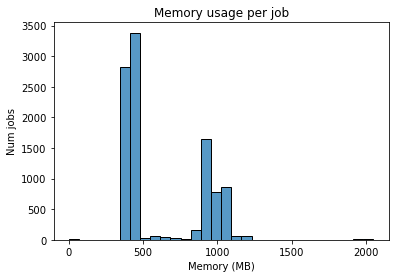

In [7]:
fig, ax = plt.subplots(1)
sns.histplot(data=resources, x="memory", ax=ax, bins=30)
ax.set(title="Memory usage per job", xlabel="Memory (MB)", ylabel="Num jobs")
plt.show()
plt.close(fig)

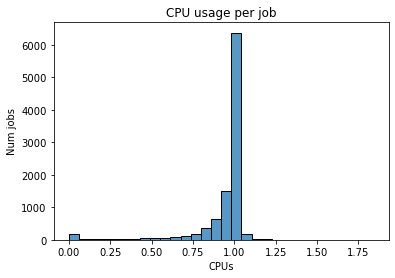

In [8]:
fig, ax = plt.subplots(1)
sns.histplot(data=resources, x="cpus", ax=ax, bins=30)
ax.set(title="CPU usage per job", xlabel="CPUs", ylabel="Num jobs")
plt.show()
plt.close(fig)

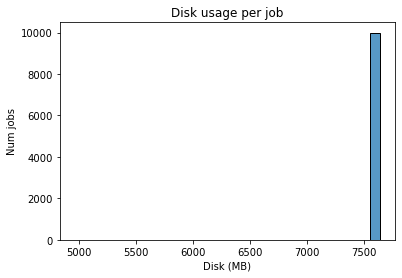

In [9]:
fig, ax = plt.subplots(1)
sns.histplot(x=resources["disk"]/1000, ax=ax, bins=30)
ax.set(title="Disk usage per job", xlabel="Disk (MB)", ylabel="Num jobs")
plt.show()
plt.close(fig)

# Runtimes

In [10]:
energies = an.load_energies(energize_out_dir)
energies.head()

Skipped 0 log directories because they did not contain energies.txt


,pdb_fn,variant,job_uuid,start_time,run_time,total_score,dslf_fa13,fa_atr,fa_dun,fa_elec,...,env,hs_pair,linear_chainbreak,overlap_chainbreak,pair,rg,rsigma,sheet,ss_pair,vdw
0,2qmt_p.pdb,"L12D,T51I,T55K",fT8dtQWjhUyL,2021-04-01 12:36:19,114,-215.580,0.0,-321.204,67.050,-142.686,...,-22.043,-4.155,0.0,0.0,-2.443,33.334,-22.923,0.343,-33.085,0.000
1,2qmt_p.pdb,"L12M,D22I,E56W",fT8dtQWjhUyL,2021-04-01 11:19:33,117,-201.816,0.0,-331.276,63.406,-121.336,...,-17.262,-3.540,0.0,0.0,2.034,33.474,-22.270,0.343,-31.007,0.000
2,2qmt_p.pdb,"Y3M,N35P,G41E",fT8dtQWjhUyL,2021-04-01 11:27:35,127,-195.776,0.0,-323.635,65.251,-128.688,...,-19.106,-2.687,0.0,0.0,1.944,33.799,-23.704,0.343,-34.502,0.000
3,2qmt_p.pdb,"L5H,A20I,T25D",fT8dtQWjhUyL,2021-04-01 11:49:10,117,-191.934,0.0,-329.467,75.982,-145.724,...,-20.848,-4.414,0.0,0.0,-1.401,33.533,-24.999,0.343,-34.136,0.193
4,2qmt_p.pdb,"K10S,K28L,T53W",fT8dtQWjhUyL,2021-04-01 12:45:31,113,-215.292,0.0,-329.860,65.334,-142.008,...,-12.984,-4.272,0.0,0.0,1.213,33.168,-22.714,0.343,-32.998,0.000


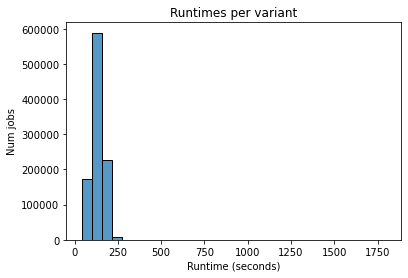

In [11]:
fig, ax = plt.subplots(1)
sns.histplot(data=energies, x="run_time", ax=ax, bins=30)
ax.set(title="Runtimes per variant", xlabel="Runtime (seconds)", ylabel="Num jobs")
plt.show()
plt.close(fig)

In [12]:
print("Avg runtime: {:.2f} seconds".format(energies["run_time"].mean()))

Avg runtime: 137.05 seconds


## Runtime distribution per job
The jobs that processed double mutants got a random sample of 50 double mutants. Did some jobs process their random sample faster because they ran on a faster server? Probably.

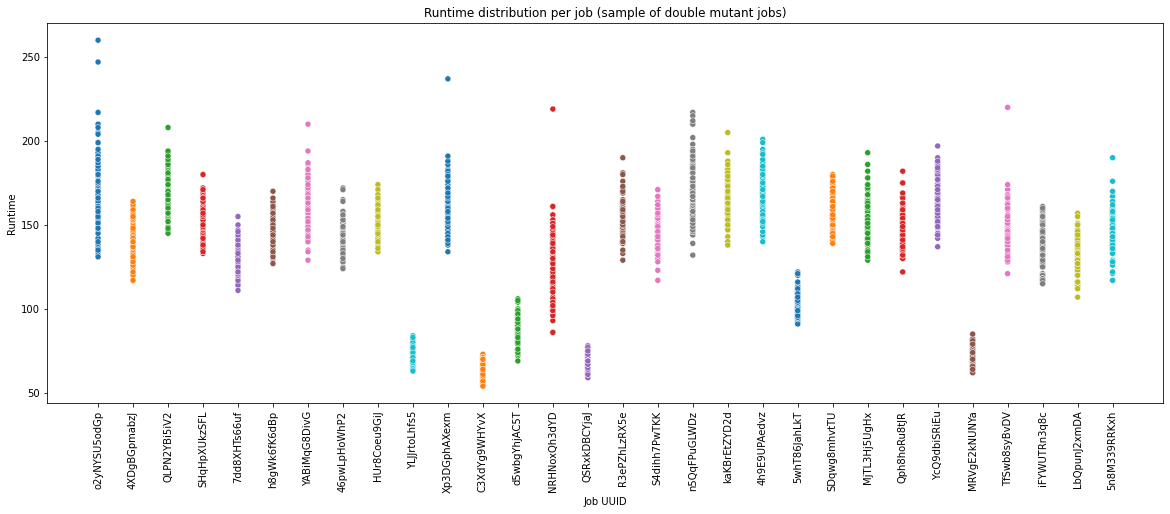

In [13]:
fig, ax = plt.subplots(1, figsize=(20, 7))
# the first 1000 are all single mutants *in order*
start_idx = 2000
max_idx = 5000
sns.scatterplot(x=energies.job_uuid[start_idx:max_idx], y=energies.run_time[start_idx:max_idx], hue=energies.job_uuid[start_idx:max_idx], palette="tab10", ax=ax)
ax.set(title="Runtime distribution per job (sample of double mutant jobs)", xlabel="Job UUID", ylabel="Runtime")
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xticks(rotation=90)
ax.get_legend().remove()
plt.show()
plt.close(fig)

# Energies
Explore the energies...

In [14]:
energies.columns

Index(['pdb_fn', 'variant', 'job_uuid', 'start_time', 'run_time',
       'total_score', 'dslf_fa13', 'fa_atr', 'fa_dun', 'fa_elec',
       'fa_intra_rep', 'fa_intra_sol_xover4', 'fa_rep', 'fa_sol',
       'hbond_bb_sc', 'hbond_lr_bb', 'hbond_sc', 'hbond_sr_bb', 'lk_ball_wtd',
       'omega', 'p_aa_pp', 'pro_close', 'rama_prepro', 'ref', 'yhh_planarity',
       'filter_total_score', 'buried_all', 'buried_np', 'contact_all',
       'contact_buried_core', 'contact_buried_core_boundary', 'degree',
       'degree_core', 'degree_core_boundary', 'exposed_hydrophobics',
       'exposed_np_AFIMLWVY', 'exposed_polars', 'exposed_total',
       'one_core_each', 'pack', 'res_count_all', 'res_count_buried_core',
       'res_count_buried_core_boundary', 'res_count_buried_np_core',
       'res_count_buried_np_core_boundary', 'ss_contributes_core', 'ss_mis',
       'total_hydrophobic', 'total_hydrophobic_AFILMVWY', 'total_sasa',
       'two_core_each', 'unsat_hbond', 'centroid_total_score', 'cbeta',
  

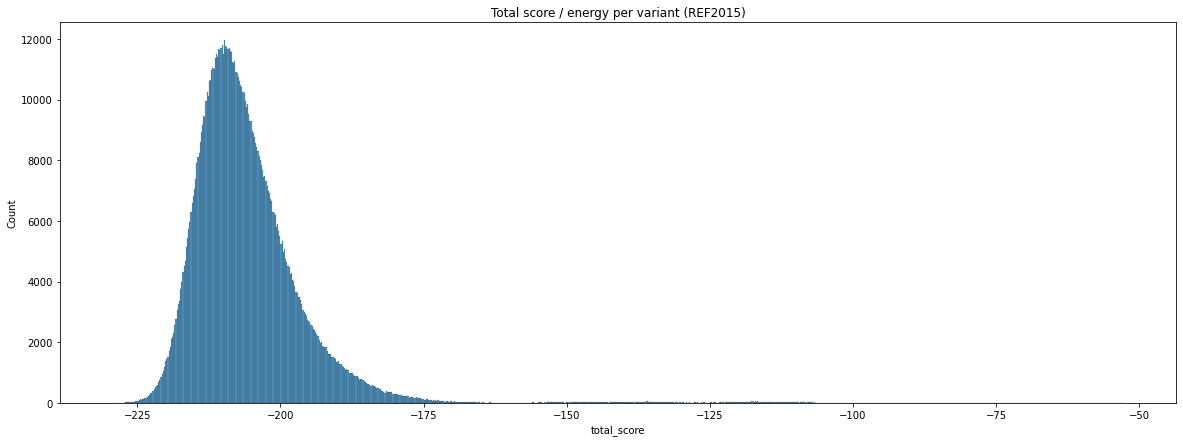

In [15]:
fig, ax = plt.subplots(1, figsize=(20, 7))
sns.histplot(data=energies, x="total_score", ax=ax)
ax.set(title="Total score / energy per variant (REF2015)")
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()
plt.close(fig)

In [16]:
# load the WT energies separately
wt_energies_fn = "/Users/sg/PycharmProjects/rosettafy/output/gb1_wt_energies.txt"
wt_energies = pd.read_csv(wt_energies_fn)

In [17]:
wt_energies

,pdb_fn,variant,job_uuid,start_time,run_time,total_score,dslf_fa13,fa_atr,fa_dun,fa_elec,...,env,hs_pair,linear_chainbreak,overlap_chainbreak,pair,rg,rsigma,sheet,ss_pair,vdw
0,2qmt_p.pdb,_wt,4acdvpFJsnhv,2021-04-12 20:50:08,70,-216.419,0.0,-317.763,61.911,-134.949,...,-19.18,-4.3,0.0,0.0,-1.391,33.432,-21.865,0.343,-32.693,0.0


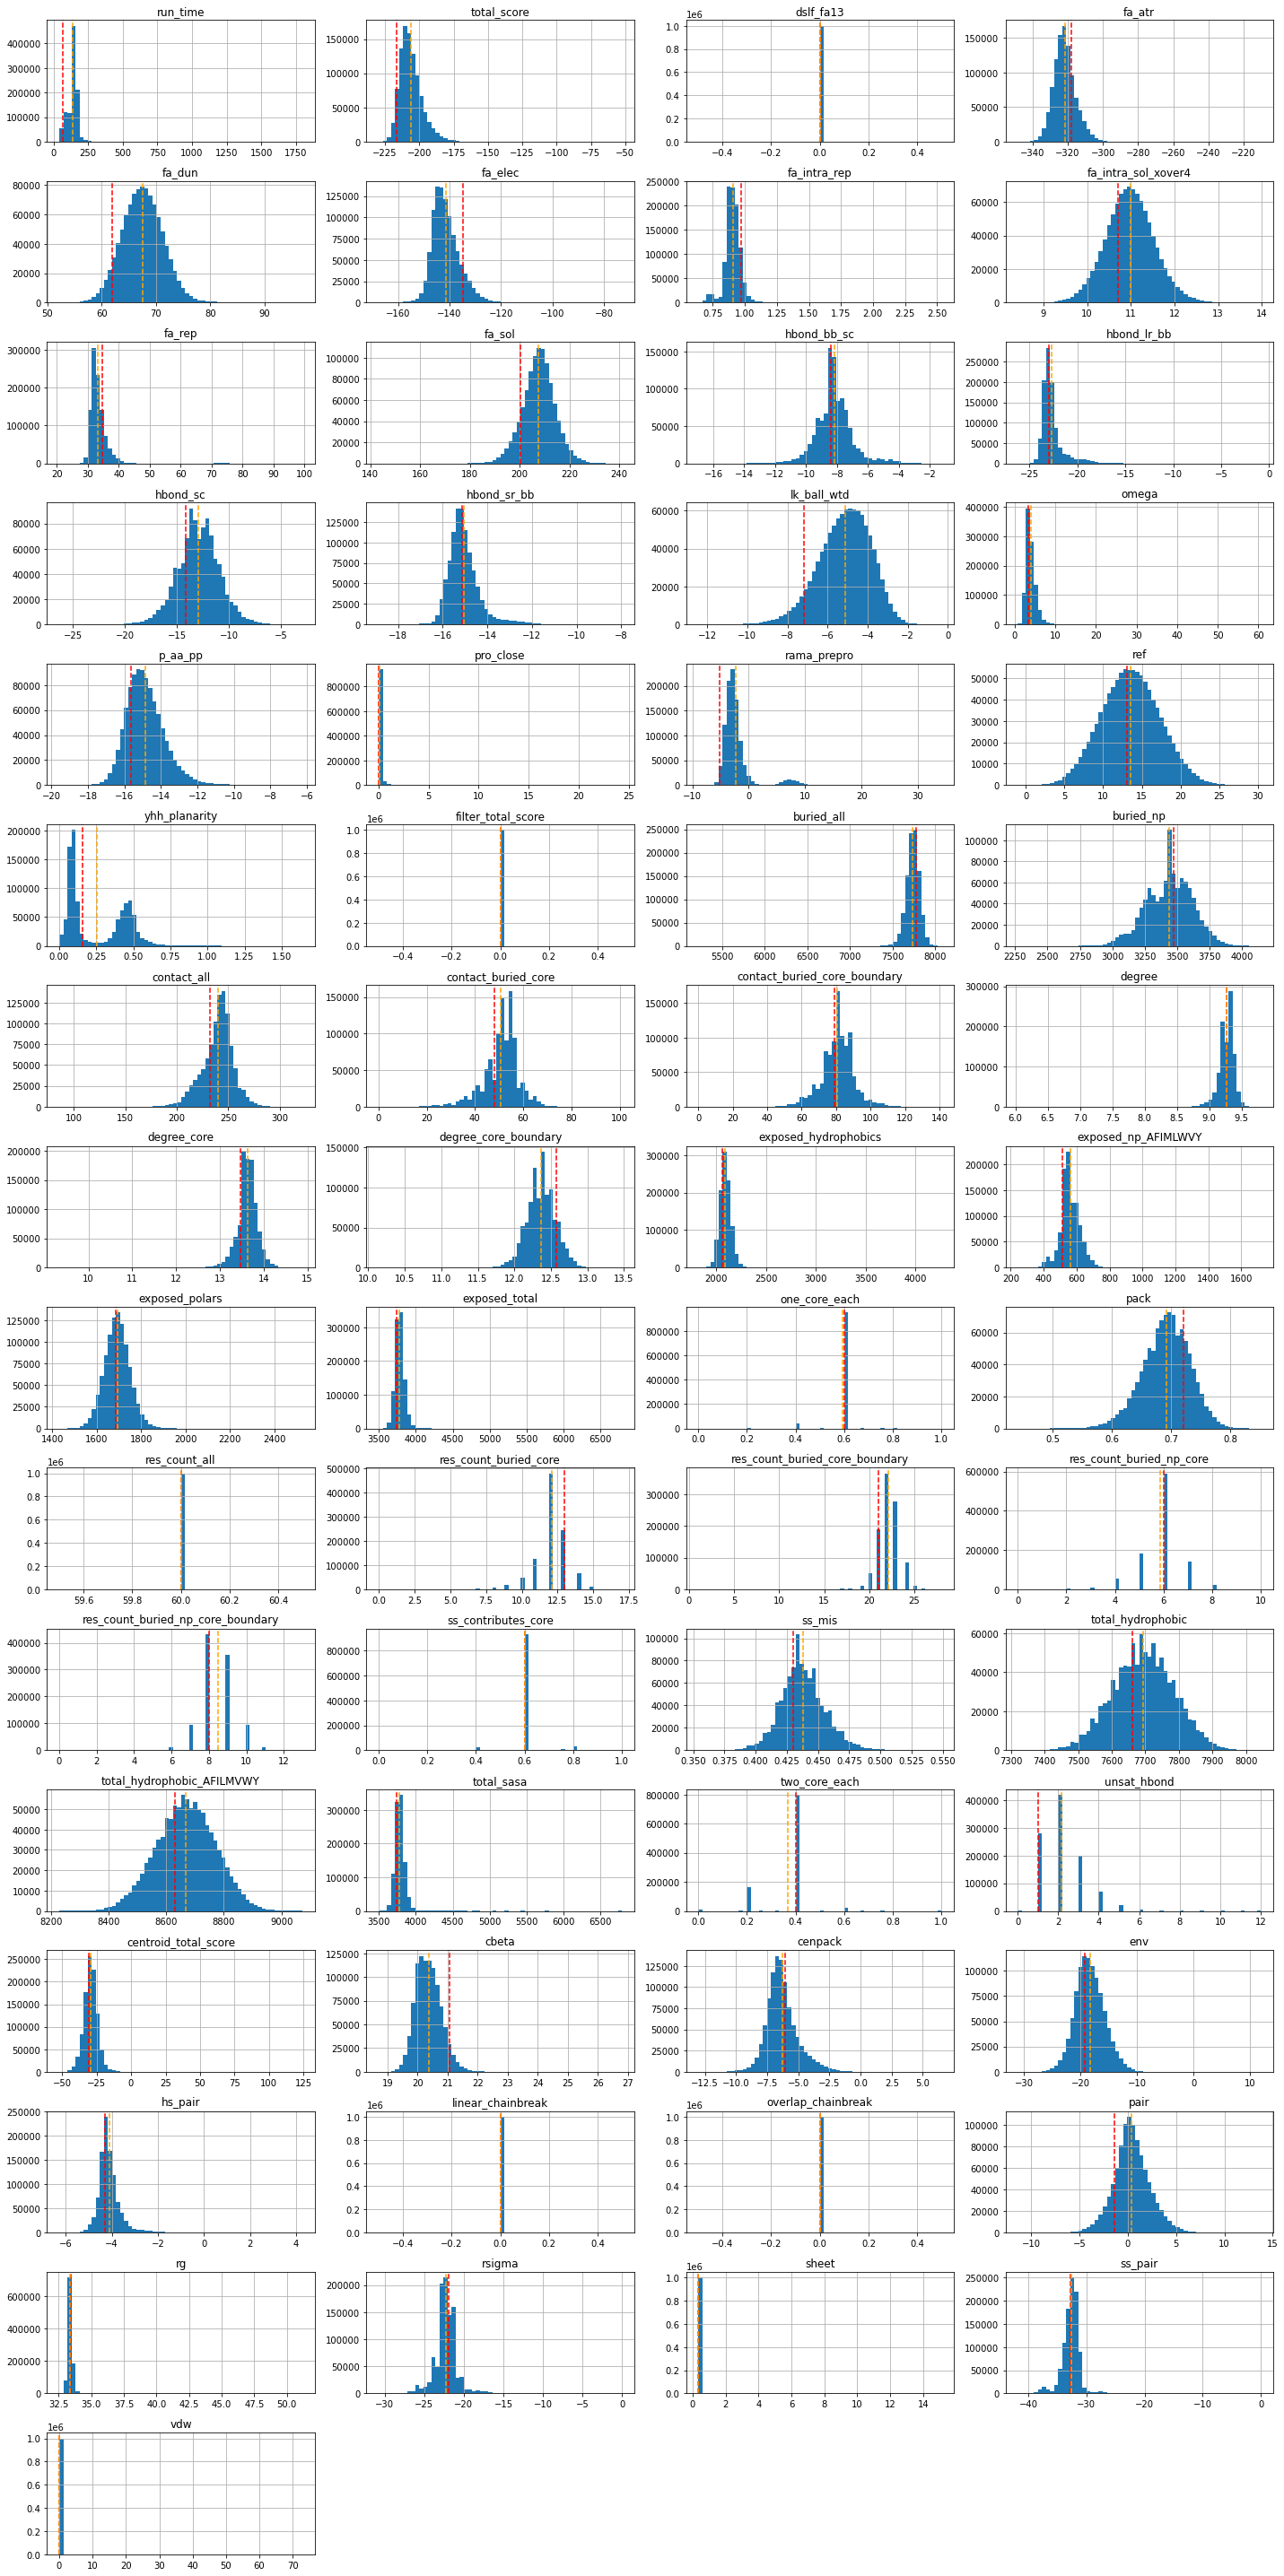

In [35]:
axes = energies.hist(bins=60, figsize=(20, 40), layout=(16, 4))
for i in range(len(energies.columns)-4):
    ax = axes.flatten()[i]
    ax.axvline(wt_energies.iloc[0, 4+i], color="red", linestyle="dashed", linewidth=1.5)
    ax.axvline(energies.iloc[:, 4+i].mean(), color="orange", linestyle="dashed", linewidth=1.5)
#     ax.set_title(ax.get_title()+" (WT={})".format(wt_energies.iloc[0, 4+i]))
plt.tight_layout()
plt.show()
plt.close(axes[0][0].get_figure())

<AxesSubplot:ylabel='Count'>

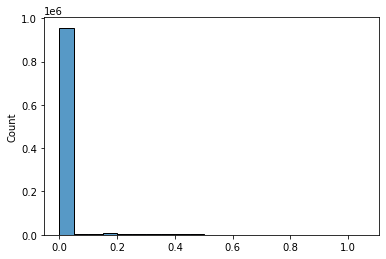

In [34]:
sns.histplot(sorted(energies["vdw"])[:-1200])